In [52]:
import numpy as np
import pandas as pd
from scipy import stats
import random
import math
import matplotlib.pyplot as plt
import time

In [53]:

## random generate numbers
n = 10000
d = 10
n = 10000
d = 10
x = np.random.normal(size=(n,d))
error = np.random.normal(size=(n,1))

b = np.random.uniform(size=(d,1))

### in order to avoid Perfect Separation, we need to add some noise
y = x@b + error

# y = list(map(lambda x: 1 if x > 0 else 0, y))

# binary
# y = np.array([0 if x <0 else 1  for x in y])

## 3 classes
y = np.array([0 if x < -1 else 1 if x < 1 else 2 for x in y])

([array([4.000e+00, 7.400e+01, 5.700e+02, 2.086e+03, 3.461e+03, 2.647e+03,
         9.510e+02, 1.860e+02, 2.000e+01, 1.000e+00]),
  array([6.000e+00, 7.700e+01, 6.260e+02, 2.043e+03, 3.384e+03, 2.695e+03,
         9.960e+02, 1.630e+02, 9.000e+00, 1.000e+00]),
  array([   5.,   86.,  616., 2088., 3411., 2641.,  961.,  180.,   12.,
            0.]),
  array([   4.,   87.,  614., 2015., 3452., 2650.,  986.,  176.,   16.,
            0.]),
  array([   7.,   94.,  582., 2089., 3340., 2700.,  989.,  183.,   16.,
            0.]),
  array([9.000e+00, 8.700e+01, 5.920e+02, 2.120e+03, 3.292e+03, 2.730e+03,
         9.880e+02, 1.730e+02, 8.000e+00, 1.000e+00]),
  array([   5.,  105.,  579., 2129., 3381., 2580., 1008.,  194.,   19.,
            0.]),
  array([  12.,   91.,  635., 2091., 3356., 2662.,  975.,  169.,    9.,
            0.]),
  array([5.000e+00, 7.900e+01, 5.950e+02, 2.124e+03, 3.327e+03, 2.653e+03,
         1.032e+03, 1.720e+02, 1.000e+01, 3.000e+00]),
  array([3.000e+00, 7.700e+01,

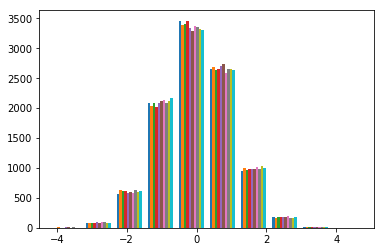

In [54]:
plt.hist(x)

In [55]:
class data_generate_process:
    def __init__(self, x, y):
        self.x = x
        self.y = y    
        
    def split(self, rate = 0.7, random_state = 1024, scale = False):
        ## Feature scaling is used to normalize the range of independent variables or features of data
        if scale:
            self.x = (self.x - np.mean(self.x))/x.std()
        
        n = len(self.y)
        np.random.seed(random_state)
        
        ##randomly spilte data into 70% train and 30% test
        index = list(range(n))
        np.random.shuffle(index)
        train = index[:int(rate*n)]
        test = index[int(rate*n):]
        
        self.train_x = self.x[train]
        self.test_x = self.x[test]
        self.train_y = self.y[train]
        self.test_y = self.y[test]
        
        return self.train_x, self.test_x, self.train_y, self.test_y
    
train_x, test_x, train_y, test_y = data_generate_process(x, y ).split()

In [56]:
class model:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def lda(self, x = None, y = None):
        if x is None:
            x = self.x
        if y is None:
            y = self.y
            
        ## vector of k classes in an ascending order
        groups = np.unique(y)
        self.groups = groups
        
        ##create N by k (classes) matrix
        likehood = np.zeros((len(x), len(groups))) 
        
        means = {}
        covariances = {}
        indexs = {}
        
        for group in groups:
            ##get the index of all the x that belong to k classes
            index = np.where(y == groups[group])[0]
            indexs[group] = index
            
            means[group] = np.mean(x[index],axis = 0)
            
            covariances[group] = np.cov(x.T)
            
        self.index = indexs
        self.mean = means
        self.covariance = covariances 

    def lda_predict(self, x, mean = None, covariance = None):
        if covariance is None:
            covariance = self.covariance

        if mean is None:
            mean = self.mean
            
        
        ##create N by k (classes) matrix
        likehood = np.zeros((len(x), len(self.groups)))
#         print(likehood.shape)
        for group in self.groups:
            mean = self.mean[group]
            covariance = self.covariance[group]
            covariance_inv = np.linalg.inv(covariance)
            ## calcuate how many points belong to kth class
            ## that's the probably
            points = len(self.index[group])
            
            probablity = x@covariance_inv@mean - 0.5*mean.T@covariance_inv@mean +np.log(points)
                                
            likehood[:,group] = probablity
            
        ##get the index of max likehood for each observations
            self.labels = likehood.argmax(axis = 1)
        return self.labels
            
    def qda(self, x = None, y = None):
        if x is None:
            x = self.x
        if y is None:
            y = self.y
            
        ## vector of k classes in an ascending order
        groups = np.unique(y)
        self.groups = groups
        
        ##create N by k (classes) matrix
        likehood = np.zeros((len(x), len(groups)))  
        
        means = {}
        covariances = {}
        indexs = {}
        
        for group in groups:
            ##get the index of all the x that belong to k classes
            index = np.where(y == groups[group])[0]
            indexs[group] = index
            
             ## calcuate mean & covariance matrix of all the x that belong to k classes
            means[group] = np.mean(x[index],axis = 0)
            
            covariances[group] = np.cov(x[index].T)
        
        self.index = indexs
        self.mean = means
        self.covariance = covariances
 
    def qda_predict(self, x, mean = None, covariance = None):
        if covariance is None:
            covariance = self.covariance

        if mean is None:
            mean = self.mean
            
        
        ##create N by k (classes) matrix
        likehood = np.zeros((len(x), len(self.groups)))
#         print(likehood.shape)
        for group in self.groups:
            mean = self.mean[group]
            covariance = self.covariance[group]
            
            ## calcuate how many points belong to kth class
            ## that's the probably
            points = len(self.index[group])
            
            shift = x - mean
            ## create a diag matrix of covariance with all 0 expcet the diagonal
            scale = np.diagflat(np.diag(covariance))
            scale_inv = np.linalg.inv(scale)
            det = np.linalg.det(scale)
            ## log(points/N), N can't be obmitted
#             probablity = np.log(points)- 0.5*np.log(np.linalg.det(scale))- 0.5*np.diag(shift@np.linalg.inv(scale)@shift.T)
            probablity = np.log(points) - 0.5*np.log(det ) - 0.5*np.diag(shift@scale_inv@shift.T)
                                
            likehood[:,group] = probablity
            
        ##get the index of max likehood for each observations
            self.labels = likehood.argmax(axis = 1)
        return self.labels

    def confusion_matirx(self, test, pred):
        groups = np.unique(test_y)
        
        index_true = {i:[] for i in groups}

        ## index of each class of true labels
        for index, label in enumerate(test_y):
            index_true[label].append(index)

        counts = []
        ## groupby classes of true labels, count the numbers for each class in predict
        for group in groups:
            count = {i:0 for i in groups}
            for label in pred[index_true[group]]:
                count[label] += 1
            counts.append(count)

        matirx = pd.DataFrame(counts)
        columns_names =  ['predict '+str(group) for group in groups]
        matirx.columns = columns_names
        
        self.matirx = matirx
        return  self.matirx
        ## accuracy
    def performance(self, test, pred):
        
        mat = self.confusion_matirx(test, pred).values


        self.accuracy = np.diag(mat).sum()/mat.sum()
        
        self.precision = np.diag(mat) / np.sum(mat, axis = 0) 
        self.recall = np.diag(mat)/ np.sum(mat, axis = 1) 
        
        self.fmeasure = [x*y/(x+y) if (x+y) >0 else 0 for x, y in zip(self.precision,self.recall)]


        df = pd.DataFrame([ self.precision, self.recall, self.fmeasure]).T
        df.columns = ['precision', 'recall', 'f1-score']

        return df

# Linear Discriminant Analysis (LDA)
# https://en.wikipedia.org/wiki/Linear_discriminant_analysis
# Assume all $\Sigma_k == \Sigma_l $
# Final Decision Scores
# $ \delta_k(x) = X\Sigma^{-1}\mu - 1/2\mu\Sigma^{-1}\mu + \log_k(probability)$


# 1. My solution to LDA

In [71]:
start = time.time()
ulric_lda = model(train_x, train_y)
ulric_lda.lda()
lda_pred = ulric_lda.lda_predict(test_x)
ulric_lda.performance(test_y, lda_pred)

,precision,recall,f1-score
0,0.824407,0.863051,0.421643
1,0.611364,0.593164,0.301063
2,0.814475,0.795025,0.402316


In [72]:
print(ulric_lda.confusion_matirx(test_y, lda_pred))
end = time.time()
my_lda = end - start

   predict 0  predict 1  predict 2
0        939        144          5
1        192        538        177
2          8        198        799


# 1.2 Sklearn solution to LDA

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
start = time.time()
lda = LinearDiscriminantAnalysis().fit(train_x, train_y.ravel()).predict(test_x)
print(classification_report(test_y, lda, digits=3))
print(confusion_matrix(test_y, lda))
end = time.time()
sk_lda = end - start

              precision    recall  f1-score   support

           0      0.844     0.829     0.836      1088
           1      0.593     0.655     0.622       907
           2      0.835     0.772     0.802      1005

    accuracy                          0.757      3000
   macro avg      0.757     0.752     0.754      3000
weighted avg      0.765     0.757     0.760      3000

[[902 183   3]
 [163 594 150]
 [  4 225 776]]


# Quadratic discriminant analysis
https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis
# relax $\Sigma_k == \Sigma_l $
# Final Decision Scores for all x 
## $ \delta_k(x) = -1/2(X-\mu_k)\Sigma_k^{-1}(x-\mu_k) - 1/2\log(\det \Sigma )+ \log_k(probability)$

# 2.My solution to QDA

In [60]:

ulric_qda = model(train_x, train_y)
ulric_qda.qda()
qda_pred = ulric_qda.qda_predict(test_x)
ulric_qda.performance(test_y, qda_pred)


,precision,recall,f1-score
0,0.820604,0.849265,0.417344
1,0.601545,0.600882,0.300607
2,0.821281,0.791045,0.402940


In [61]:
ulric_qda.confusion_matirx(test_y, qda_pred)

,predict 0,predict 1,predict 2
0,924,159,5
1,194,545,168
2,8,202,795


# 2.2 SKlearn solution to QDA

In [62]:

qda = QuadraticDiscriminantAnalysis().fit(train_x, train_y.ravel()).predict(test_x)
print(classification_report(test_y, qda, digits=3))


              precision    recall  f1-score   support

           0      0.855     0.815     0.834      1088
           1      0.581     0.681     0.627       907
           2      0.840     0.751     0.793      1005

    accuracy                          0.753      3000
   macro avg      0.759     0.749     0.752      3000
weighted avg      0.767     0.753     0.758      3000



In [63]:
print(confusion_matrix(test_y,qda))

## almost as my solutions

[[887 198   3]
 [148 618 141]
 [  3 247 755]]
